In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil import parser

In [22]:
df = pd.read_csv('autosleep.csv')
#df = pd.DataFrame(df["ISO8601"], df["asleep"])
df['ISO8601'] = df["ISO8601"].astype("string").str.split('T').str[0]
df['ISO8601']
sleeptime = df[["ISO8601", "asleep"]]
init_date = 6
sep = 30
oct = 31
nov = 30

In [23]:

def fill_missing_dates(df):
    df['ISO8601'] = pd.to_datetime(df['ISO8601'])
    # Set date range for the DataFrame
    start_date = df['ISO8601'].min()
    end_date = df['ISO8601'].max()
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Reindex the DataFrame to fill in the missing dates
    df.set_index('ISO8601', inplace=True)
    df = df.reindex(date_range, fill_value='00:00:00')

    # Reset the index to get 'ISO8601' column back
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'ISO8601'}, inplace=True)

    return df

In [24]:
sleeptime = fill_missing_dates(sleeptime)

/var/folders/h7/tgms4qx50pv2v2_ppqcm0d1m0000gn/T/ipykernel_94978/1203316419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ISO8601'] = pd.to_datetime(df['ISO8601'])


In [25]:
def converter(timestr):
    timestr = timestr.split(':')
    return (int(timestr[0]) + int(timestr[1])/60 + int(timestr[2])/3600).__round__(2)

In [26]:
df = fill_missing_dates(df)

In [27]:
asleep = df["asleep"].apply(converter)
asleep_rmRW = asleep.drop([init_date+sep+29, init_date+sep+30, init_date+sep+31, init_date+oct+32])

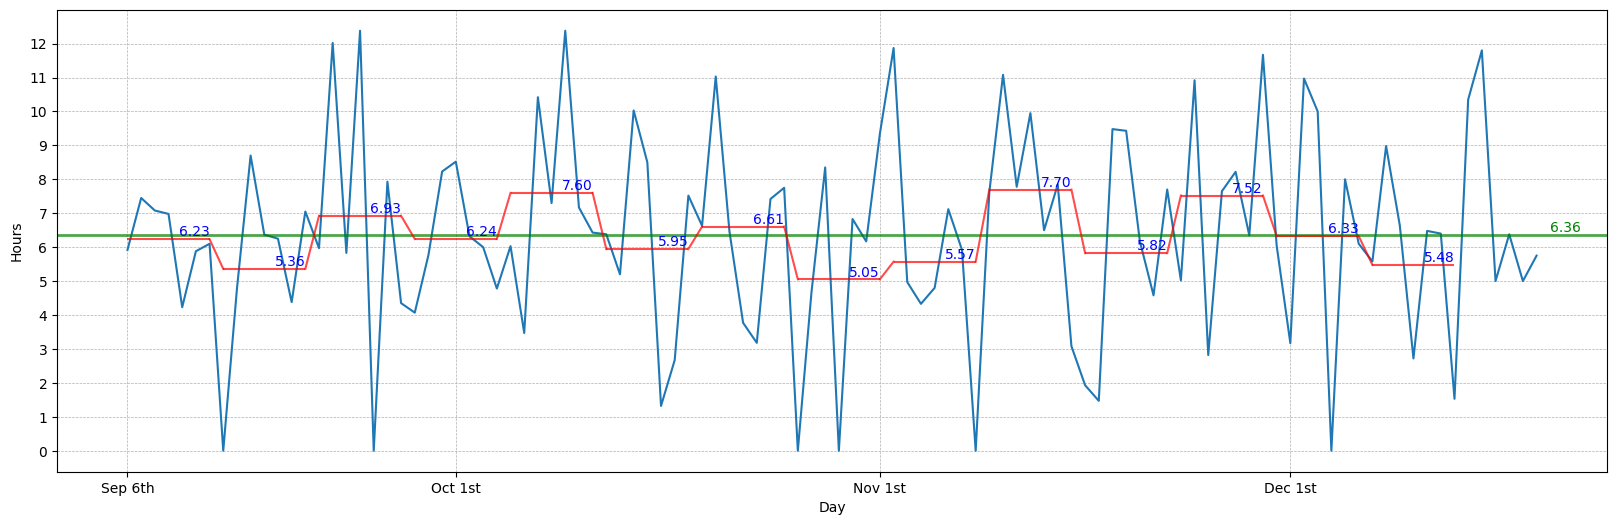

In [28]:

plt.figure(figsize=(20, 6))
plt.plot(asleep)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])

plt.xticks([0, sep-init_date, sep+oct-init_date, sep+oct+nov-init_date], ['Sep 6th', 'Oct 1st', 'Nov 1st', 'Dec 1st'])
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Day')
plt.ylabel('Hours')
overall_avg = np.mean(asleep_rmRW)
plt.axhline(y=overall_avg, color='green', linestyle='-', linewidth=2, alpha=0.7, label=f'Overall Average: {overall_avg:.2f}')
plt.text(asleep.count(), overall_avg, f'{overall_avg:.2f}', verticalalignment='bottom', horizontalalignment='left', color='green', fontsize=10)

previous_avg = None
previous_end_index = None

for i in range(0, len(asleep), 7):
    if i + 7 <= len(asleep):
        current_avg = np.mean(asleep[i:i+7])

        # Plot horizontal line for current 7-day cycle
        plt.hlines(current_avg, i, i+6, colors='r', linestyles='-', alpha=0.7)
        plt.text(i+6, current_avg, f'{current_avg:.2f}', verticalalignment='bottom', horizontalalignment='right', color='blue', fontsize=10)

        # If there is a previous cycle, draw a line connecting the last average to the first average of the current cycle
        if previous_avg is not None:
            plt.plot([previous_end_index, i], [previous_avg, current_avg], color='r', linestyle='-', alpha=0.7)

        # Update the previous cycle's average and end index
        previous_avg = current_avg
        previous_end_index = i+6

plt.show()

In [29]:
asleep.head()

0    5.92
1    7.45
2    7.08
3    6.98
4    4.23
Name: asleep, dtype: float64

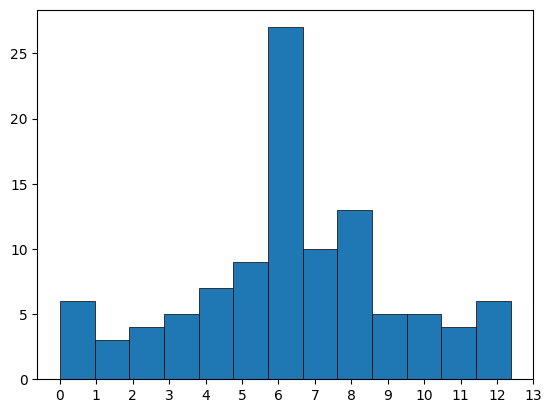

In [30]:
plt.hist(asleep, bins=13, edgecolor='black', linewidth=0.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.show()